# S02 T05: Exploració de les dades
**Objectiu: Familiaritza't amb les tècniques d'exploració de les dades mitjantçant la estructura de dades, Dataframe amb la llibreria Pandas.**

## Exercici 1
**Descarrega el data set _Airlines Delay: Airline on-time statistics and delay causes_ i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df_airlines = pd.read_csv('DelayedFlights.csv', index_col=0)
#df_airlines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DelayedFlights.csv', index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df_airlines.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_airlines.columns #To know which are all the columns of the dataframe as they can't be seen from the head

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

First we need to understand the data/columns meaning.

[AOTP]: https://catsr.vse.gmu.edu/SYST660/BigDataAnalysisInAviation_AOTP.pdf
**Airline On-Time Performance ([AOTP])**

[data definition]: https://www.stat.purdue.edu/~lfindsen/stat350/airline2008_dataset_definition.pdf
The flight [data definition]:
 * *UniqueCarrier*: Unique carrier code
 * *FlightNum*: Flight Number
 * *Origin*: origin IATA airport code
 * *Dest*: destination IATA airport code
 * *CRSDepTime*: Schedule Departure (local, hhmm)
 * *CRSArrTime*: Schedule Arrival (local, hhmm)
 * *DepTime*: Actual Departure Time (local, hhmm)
 * *ArrTime*: Actual Arrival Time. Early arrivals show negative numbers (local, hhmm)
 * *CRSElapsedTime*: Schedule Elapsed Time, where elapsed time is "The time computed from gate departure time to gate arrival time." (minutes)
 * *ActualElapsedTime*: Actual Elapsed Time (minutes)
 * *AirTime*: The total time an aircraft is in the air between an origin-destination airport pair, i.e. from wheels-off at the origin airport to wheels-on at the destination airport. (minutes)
 * *ArrDelay*: Difference in Minutes Between Actual Arrival Time and CRS Scheduled Arrival Time (minutes)
 * *DepDelay*: Difference in Minutes Between Actual Departure Time and CRS Scheduled Departure Time (minutes)
 * *TaxiIn*: Wheels down and arrival at the destination airport gate (minutes)
 * *TaxiOut*: The time elapsed between departure from the origin airport gate and wheels off (minutes)
 * *Cancelled*: was the flight cancelled? 1 = yes, 0 = no
 * *CancellationCode*: reason for cancellation 
     * A-Carrier Caused
     * B-Weather
     * C-National Aviation System (NAS)
     * D-Security
 * *Diverted*: was the flight diverted? 1 = yes, 0 = no


[link info]: https://www.bts.gov/explore-topics-and-geography/topics/airline-time-performance-and-causes-flight-delays
The airlines report the causes of delays in five broad categories [link info]:

 * **Air Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
 * **Extreme Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
 * **National Aviation System (NAS):** Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
 * **Late-arriving aircraft:** A previous flight with same aircraft arrived late, causing the present flight to depart late.
 * **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

**A flight will be late if a flight is arriving or departing 15 minutes or more after the scheduled time.**

In [6]:
df_airlines.shape # To know the overall dimensions of the dataframe

(1936758, 29)

From the 30 columns, index column, flight number or tail number, don't have relevant information and therefore we can remove them.

More columns could be removed, but I'm leaving them on for testing different types of graphs in the following exercise.

In [7]:
df_al=df_airlines.drop(['FlightNum', 'TailNum'], axis=1)

In [8]:
df_al.shape # To check if the columns have been removed 

(1936758, 27)

## Exercici 2
**Fes un informe complet del data set:**

*** Resumeix estadísticament les columnes d’interès**

*** Troba quantes dades faltants hi ha per columna**

*** Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)**

*** Taula de les aerolínies amb més endarreriments acumulats**

*** Quins són els vols més llargs? I els més endarrerits?**
**Etc.**

We note that we have over 1.9M data. Let's analyze it

In [9]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # To avoid exponential numbers in the describe table
df_al.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1929648.0,1936758.0,1928371.0,1936560.0,...,1936758.0,1929648.0,1936303.0,1936758.0,1936758.0,1247488.0,1247488.0,1247488.0,1247488.0,1247488.0
mean,2008.0,6.1,15.8,4.0,1518.5,1467.5,1610.1,1634.2,133.3,134.3,...,765.7,6.8,18.2,0.0,0.0,19.2,3.7,15.0,0.1,25.3
std,0.0,3.5,8.8,2.0,450.5,424.8,548.2,464.6,72.1,71.3,...,574.5,5.3,14.3,0.0,0.1,43.5,21.5,33.8,2.0,42.1
min,2008.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,14.0,-25.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2008.0,3.0,8.0,2.0,1203.0,1135.0,1316.0,1325.0,80.0,82.0,...,338.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2008.0,6.0,16.0,4.0,1545.0,1510.0,1715.0,1705.0,116.0,116.0,...,606.0,6.0,14.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0
75%,2008.0,9.0,23.0,6.0,1900.0,1815.0,2030.0,2014.0,165.0,165.0,...,998.0,8.0,21.0,0.0,0.0,21.0,0.0,15.0,0.0,33.0
max,2008.0,12.0,31.0,7.0,2400.0,2359.0,2400.0,2400.0,1114.0,660.0,...,4962.0,240.0,422.0,1.0,1.0,2436.0,1352.0,1357.0,392.0,1316.0


We notice that all the data is from 2008 but we keep the column for now.
Other data look OK.

We check the nulls in each column

In [10]:
df_al.isnull().sum()[df_al.isnull().sum() > 0]

ArrTime                7110
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
TaxiIn                 7110
TaxiOut                 455
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

From the null values we notice:
 1. Delays variables have 689270 nulls. We assume that that the nulls are flights with no delays and therefore we will modify the nulls by a 0.

Despite is not required by the exercise we are going to reduce the number of nulls to practice working with a dataframe.   

In [11]:
df_al.fillna(value = {'CarrierDelay': 0,'WeatherDelay': 0, 'NASDelay': 0, 'SecurityDelay': 0, 'LateAircraftDelay': 0}, inplace=True)

In [12]:
df_al.isnull().sum()[df_al.isnull().sum()>0]

ArrTime              7110
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
TaxiIn               7110
TaxiOut               455
dtype: int64

 2. Check if the ArrTime nulls rows match the ActualElapsedTime nulls rows.

     2.1  If they don't match, the null could be calculated with the DepTime.
     ActualElapsedTime = DepTime - ArrTime
     
     2.2  If both are null, we can not take into acount this cases when this variables are required for calculations or we can check if there are flights in between origin - destination and replace the null by this values



In [13]:
df_al['BothNaN'] = 0    # Add a column with all 0 values
df_al.loc[(df_al['ArrTime'].isna()) & (df_al['ActualElapsedTime'].isna()), 'BothNaN'] = 1  # if both ArrTime and ActualElapsedTime are NaN then BothNaN row will be 1
df_al['BothNaN'].sum() 


7110

In [14]:
df_al['BothCancelled'] = 0    # Add a column with all 0 values
df_al.loc[(df_al['ArrTime'].isna()) & (df_al['ActualElapsedTime'].isna()) & df_al['Cancelled']==1, 'BothCancelled'] = 1  # if both ArrTime and ActualElapsedTime and the flight cancelled the row will be 1
df_al['BothCancelled'].sum() 


633

The conclusion is that the 7110 nulls that ArrTime has match the nulls in ActualElapsedTime therefore we can not calculate either of the missing values using the formula ActualElapsedTime = DepTime - ArrTime.

Of the 7110, 633 flights were cancelled

In [15]:
df_al = df_al.drop(['BothNaN'], axis=1)  # Remove the column as we no longer need it
df_al.columns # Check the the column has been remove properly

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'BothCancelled'],
      dtype='object')

Let's fill the nulls with the mean of the flights with the same Origin and Destination.

In [16]:
df_al['ActualElapsedTime'] = df_al.groupby(['Origin', 'Dest'])['ActualElapsedTime'].transform(lambda x: x.fillna(x.mean()))

It seems that some nulls remain, I print the table to try to find out which may be the reason

In [17]:
df_al[df_al['ActualElapsedTime'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,BothCancelled
94778,2008,1,29,2,2236.0,2136,NaN,2156,XE,NaN,...,9.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0
96148,2008,1,5,6,1714.0,1655,NaN,1712,XE,NaN,...,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0
174761,2008,1,4,5,1556.0,1031,NaN,1134,OO,NaN,...,37.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0
175095,2008,1,4,5,550.0,540,NaN,646,OO,NaN,...,29.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0
175467,2008,1,4,5,747.0,738,NaN,914,OO,NaN,...,27.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103340,2008,11,18,2,2321.0,2140,NaN,2200,OO,NaN,...,8.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0
6620556,2008,12,22,1,1405.0,1304,NaN,1345,OO,NaN,...,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0
6635707,2008,12,9,2,2255.0,2240,NaN,2310,OO,NaN,...,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0
6650990,2008,12,1,1,2049.0,2039,NaN,2104,OO,NaN,...,8.0,0,N,1,0.0,0.0,0.0,0.0,0.0,0


The print seems to show that the nulls remain because the flights were Diverted.
Let's check if the 94 remaining nulls are from Diverted flights

In [18]:
df_al['Diverted'][(df_al['ActualElapsedTime'].isnull()) & (df_al['Diverted']==1)].sum()

94

It's confirmed that the 94 nulls remaining in the ActualElapsedTime are do Diverted flights.
I decide not to modify this nan and leave them as they are.

The ArrTime can be calculated as _ArrTime = DepTime + ActualElapsedTime_

The other values with more than 1000nulls are _AirTime_, _TaxiIn_ and _ArrDelay_.

AirTime and TaxiIn are related with ActualElapsedTime as _ActualElapsedTime = TaxiOut + AirTime + TaxiIn_

For TaxiIn and TaxiOut we'll calculate the mean using flights with the same Origin and Destination as we did with the ActualElapsedTime.

Then with the formaula we calculate the AirTime missing values.

In [19]:
def hour_in_min(hour):
   h_in_min = (np.floor(hour/100)*60) + (hour - (np.floor(hour/100)*100))
   return h_in_min

def min_to_hour(min):
   min_to_h = (np.floor(min/60)*100) + (min - (np.floor(min/60)*60))
   return min_to_h

In [20]:
df_al['ArrTime'] = min_to_hour((hour_in_min(df_al['DepTime'])) + (df_al['ActualElapsedTime']))

In [21]:
df_al['TaxiIn'] = df_al.groupby(['Origin', 'Dest'])['TaxiIn'].transform(lambda x: x.fillna(x.mean()))
df_al['TaxiOut'] = df_al.groupby(['Origin', 'Dest'])['TaxiOut'].transform(lambda x: x.fillna(x.mean()))
df_al['AirTime'] = (df_al['ActualElapsedTime']) - (df_al['TaxiOut']) - (df_al['TaxiIn'])

Finally ArrDelay can be calculated as _ArrDelay = CRSArrTime - ArrTime_

In [22]:
df_al['ArrDelay'] = hour_in_min(df_al['ArrTime']) - hour_in_min(df_al['CRSArrTime'])

In [23]:
df_al.isnull().sum()[df_al.isnull().sum()>0]

ArrTime               94
ActualElapsedTime     94
CRSElapsedTime       198
AirTime               94
ArrDelay              94
TaxiIn                94
dtype: int64

The number of nulls have been reduced below 200. We consider that this is acceptable for this Exercise.

Now that the most of the missing information is re-fill we print the brief statistics of the columns and the correlation in between the variables

In [24]:
df_al.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,BothCancelled
count,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936664.0,1936758.0,1936664.0,1936560.0,...,1936664.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0
mean,2008.0,6.1,15.8,4.0,1518.5,1467.5,1740.7,1634.2,133.4,134.3,...,6.8,18.2,0.0,0.0,12.4,2.4,9.7,0.1,16.3,0.0
std,0.0,3.5,8.8,2.0,450.5,424.8,460.9,464.6,72.1,71.3,...,5.3,14.3,0.0,0.1,36.1,17.3,28.1,1.6,35.9,0.0
min,2008.0,1.0,1.0,1.0,1.0,0.0,28.0,0.0,14.0,-25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2008.0,3.0,8.0,2.0,1203.0,1135.0,1417.0,1325.0,80.0,82.0,...,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2008.0,6.0,16.0,4.0,1545.0,1510.0,1755.0,1705.0,116.0,116.0,...,6.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2008.0,9.0,23.0,6.0,1900.0,1815.0,2115.0,2014.0,165.0,165.0,...,8.0,21.0,0.0,0.0,10.0,0.0,6.0,0.0,18.0,0.0
max,2008.0,12.0,31.0,7.0,2400.0,2359.0,3359.0,2400.0,1114.0,660.0,...,240.0,422.0,1.0,1.0,2436.0,1352.0,1357.0,392.0,1316.0,1.0


In [25]:
df_al.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,BothCancelled
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.0,0.1,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
DayofMonth,NaN,0.1,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
DayOfWeek,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
DepTime,NaN,-0.0,0.0,0.0,1.0,0.9,1.0,0.7,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.2,0.0
CRSDepTime,NaN,-0.0,0.0,0.0,0.9,1.0,0.9,0.7,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.1,-0.0,-0.0,-0.0,0.1,0.0
ArrTime,NaN,-0.0,0.0,0.0,1.0,0.9,1.0,0.7,0.2,0.2,...,0.0,0.1,0.0,0.0,-0.0,0.0,0.1,-0.0,0.2,0.0
CRSArrTime,NaN,0.0,0.0,0.0,0.7,0.7,0.7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.1,0.0,0.0,-0.0,0.1,0.0
ActualElapsedTime,NaN,0.0,-0.0,0.0,-0.0,-0.0,0.2,0.0,1.0,1.0,...,0.2,0.3,-0.0,0.0,0.0,0.0,0.1,0.0,-0.0,-0.0
CRSElapsedTime,NaN,0.0,-0.0,0.0,-0.0,-0.0,0.2,0.0,1.0,1.0,...,0.1,0.1,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0


We create 2 new columns. One with the average velocity of the flight and a second Boolean advising if the flight was delay (as per definition if it arrive more than 15minutes after the scheduled time).

In [26]:
df_al['AvSpeed'] = df_al['Distance'] / df_al['AirTime']

In [27]:
df_al['Delayed'] = df_al['ArrDelay'] > 15

In [28]:
df_al['Delayed'].sum()

1200159

There are 1,200,159 daly flights.

Print out of the original DataFrame and the one modify to check that we haven't modify information already provided with the formulas.



In [29]:
df_al.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,BothCancelled,AvSpeed,Delayed
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,...,N,0,0.0,0.0,0.0,0.0,0.0,0,7.0,False
1,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,...,N,0,0.0,0.0,0.0,0.0,0.0,0,7.2,False
2,2008,1,3,4,628.0,620,804.0,750,WN,96.0,...,N,0,0.0,0.0,0.0,0.0,0.0,0,6.8,False
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,N,0,2.0,0.0,0.0,0.0,32.0,0,6.7,True
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,101.0,...,N,0,0.0,0.0,0.0,0.0,0.0,0,7.9,False


In [30]:
df_airlines.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Now the exercise ask for a table with the 10 companies with more delays.

In [31]:
df_al.groupby(['UniqueCarrier']).Delayed.sum().sort_values(ascending=False).head(10)

UniqueCarrier
WN    205319
AA    121055
MQ     89738
UA     88175
OO     83804
DL     72551
XE     67685
CO     61950
US     59677
EV     54289
Name: Delayed, dtype: int64

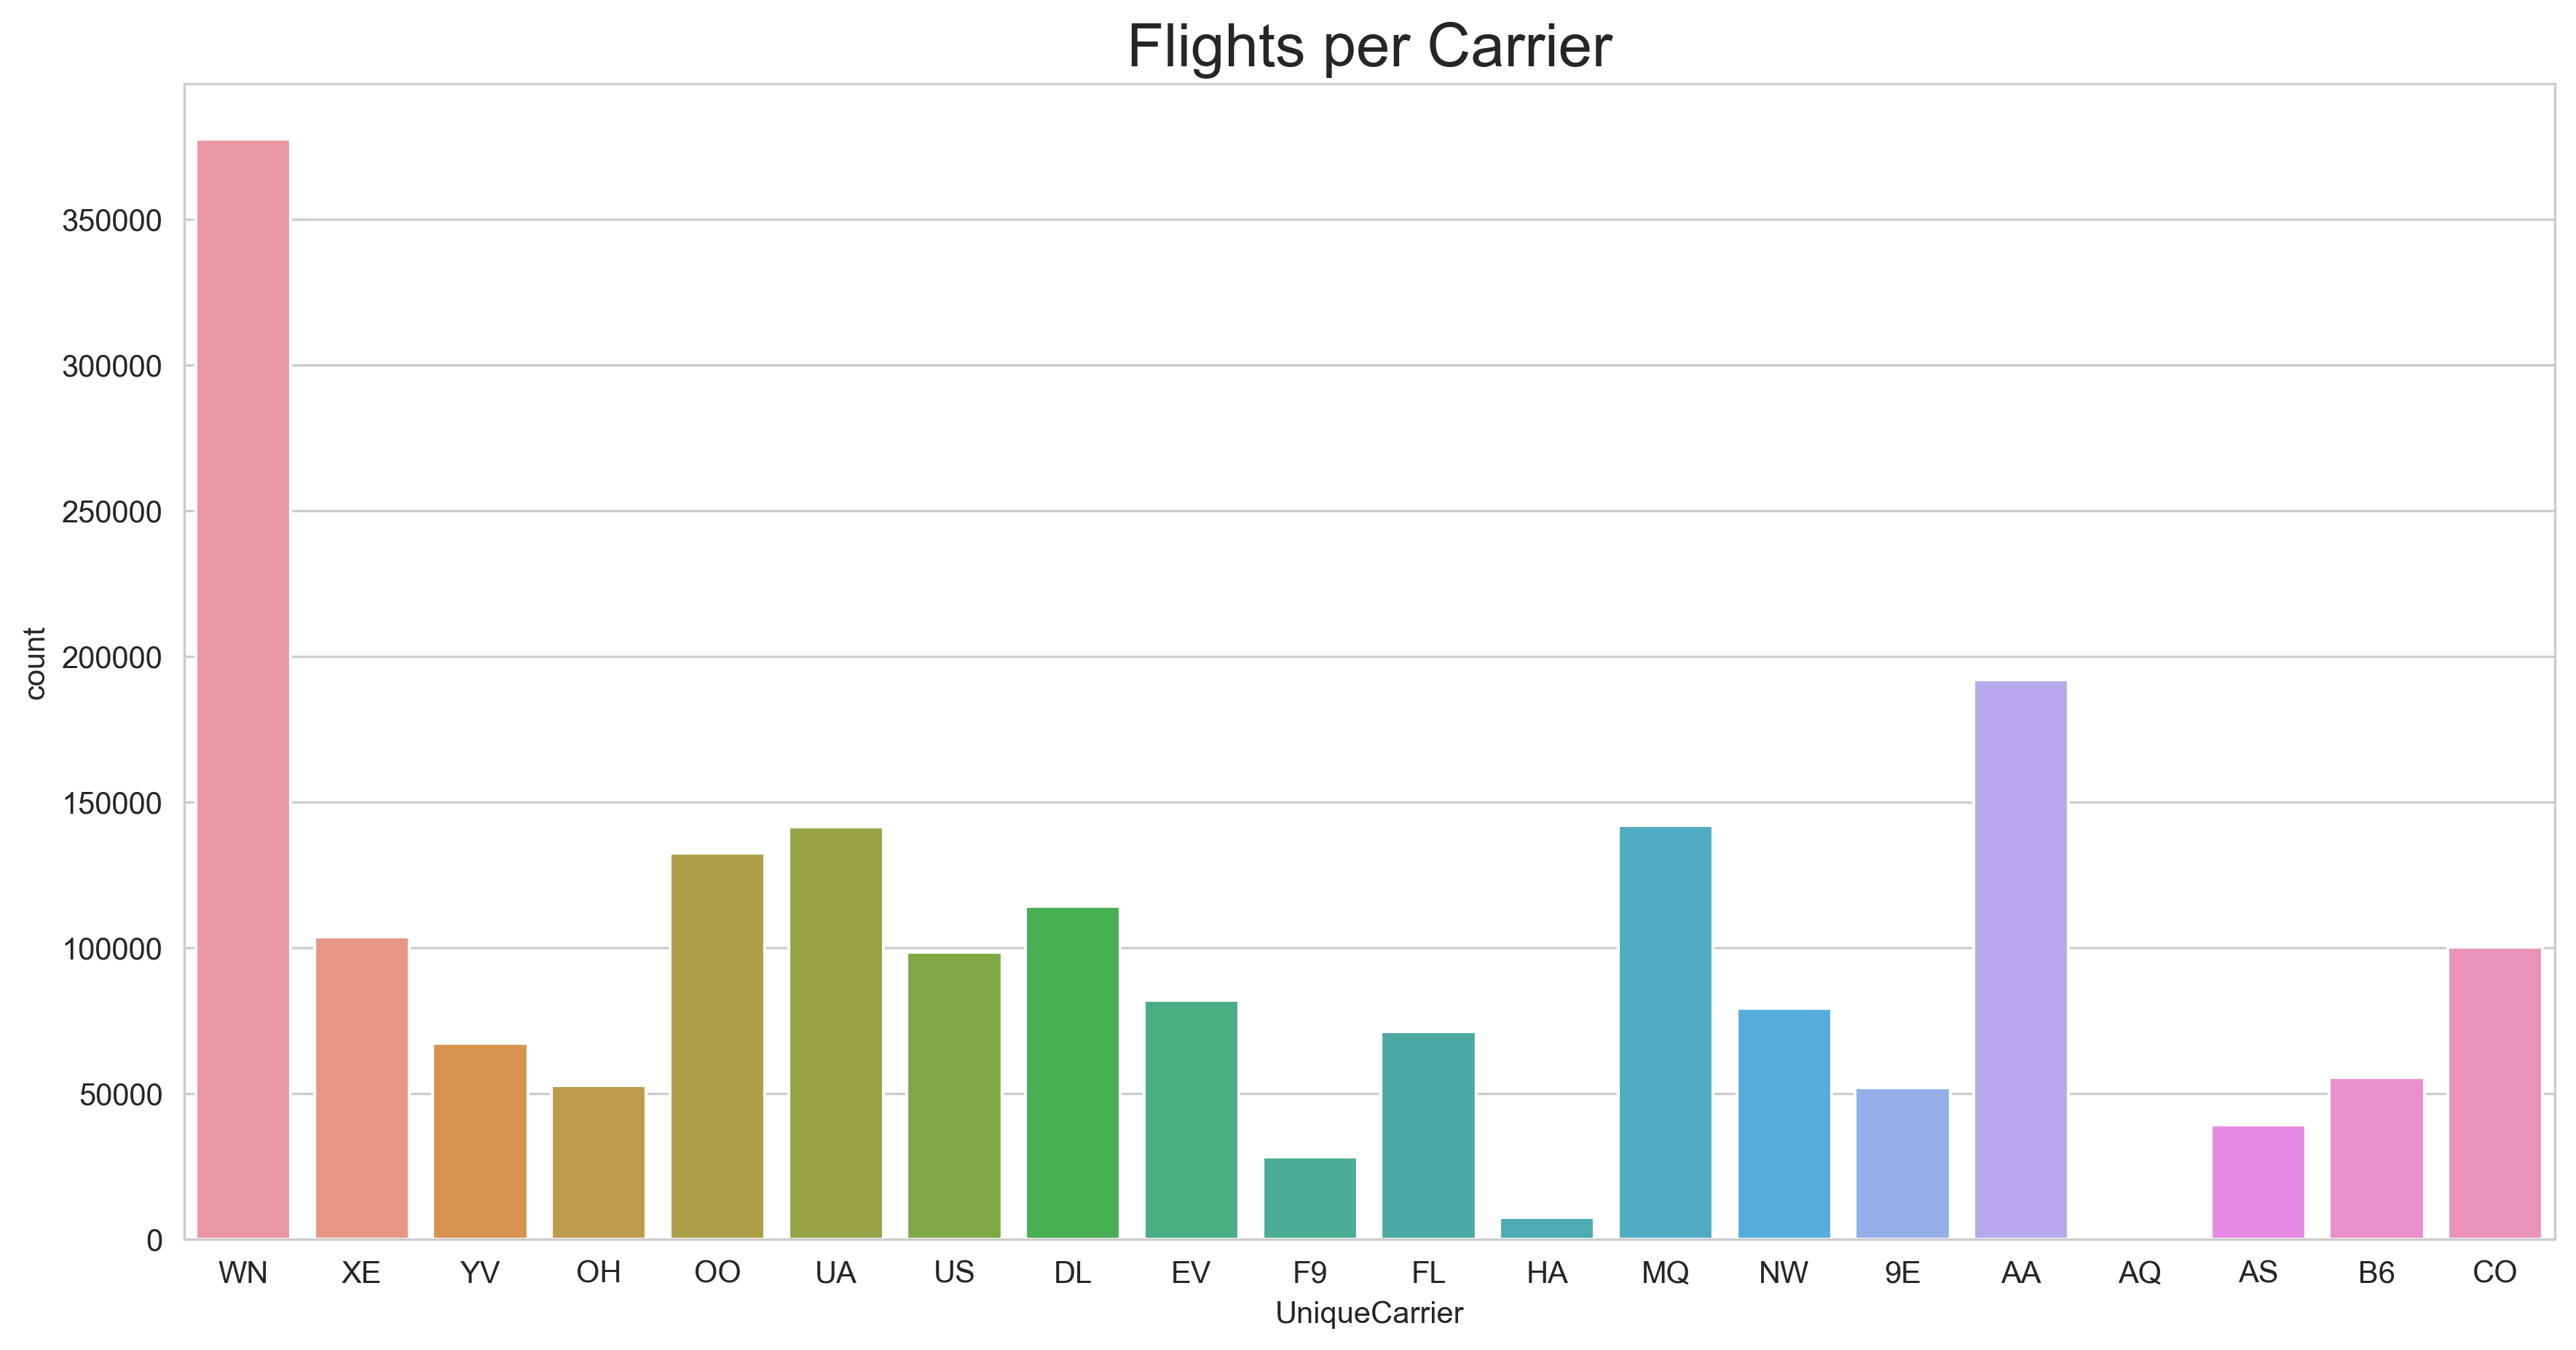

Table with the longest flights

In [32]:
df_al.groupby(['Origin', 'Dest']).Distance.max().sort_values(ascending=False).head(10)

Origin  Dest
HNL     EWR     4962
EWR     HNL     4962
HNL     ATL     4502
ATL     HNL     4502
ORD     HNL     4243
HNL     ORD     4243
KOA     ORD     4213
ORD     OGG     4184
HNL     MSP     3972
MSP     HNL     3972
Name: Distance, dtype: int64

Table with the flights with the longest delays

In [33]:
df_al.ArrDelay.sort_values(ascending=False).head(10)

3597190   1938.0
3214659   1870.0
6661241   1856.0
6897618   1842.0
3830794   1842.0
6743798   1841.0
2381381   1837.0
3591956   1835.0
1055333   1829.0
2004731   1822.0
Name: ArrDelay, dtype: float64

Attached some graphs from exercise S03T01 about delays

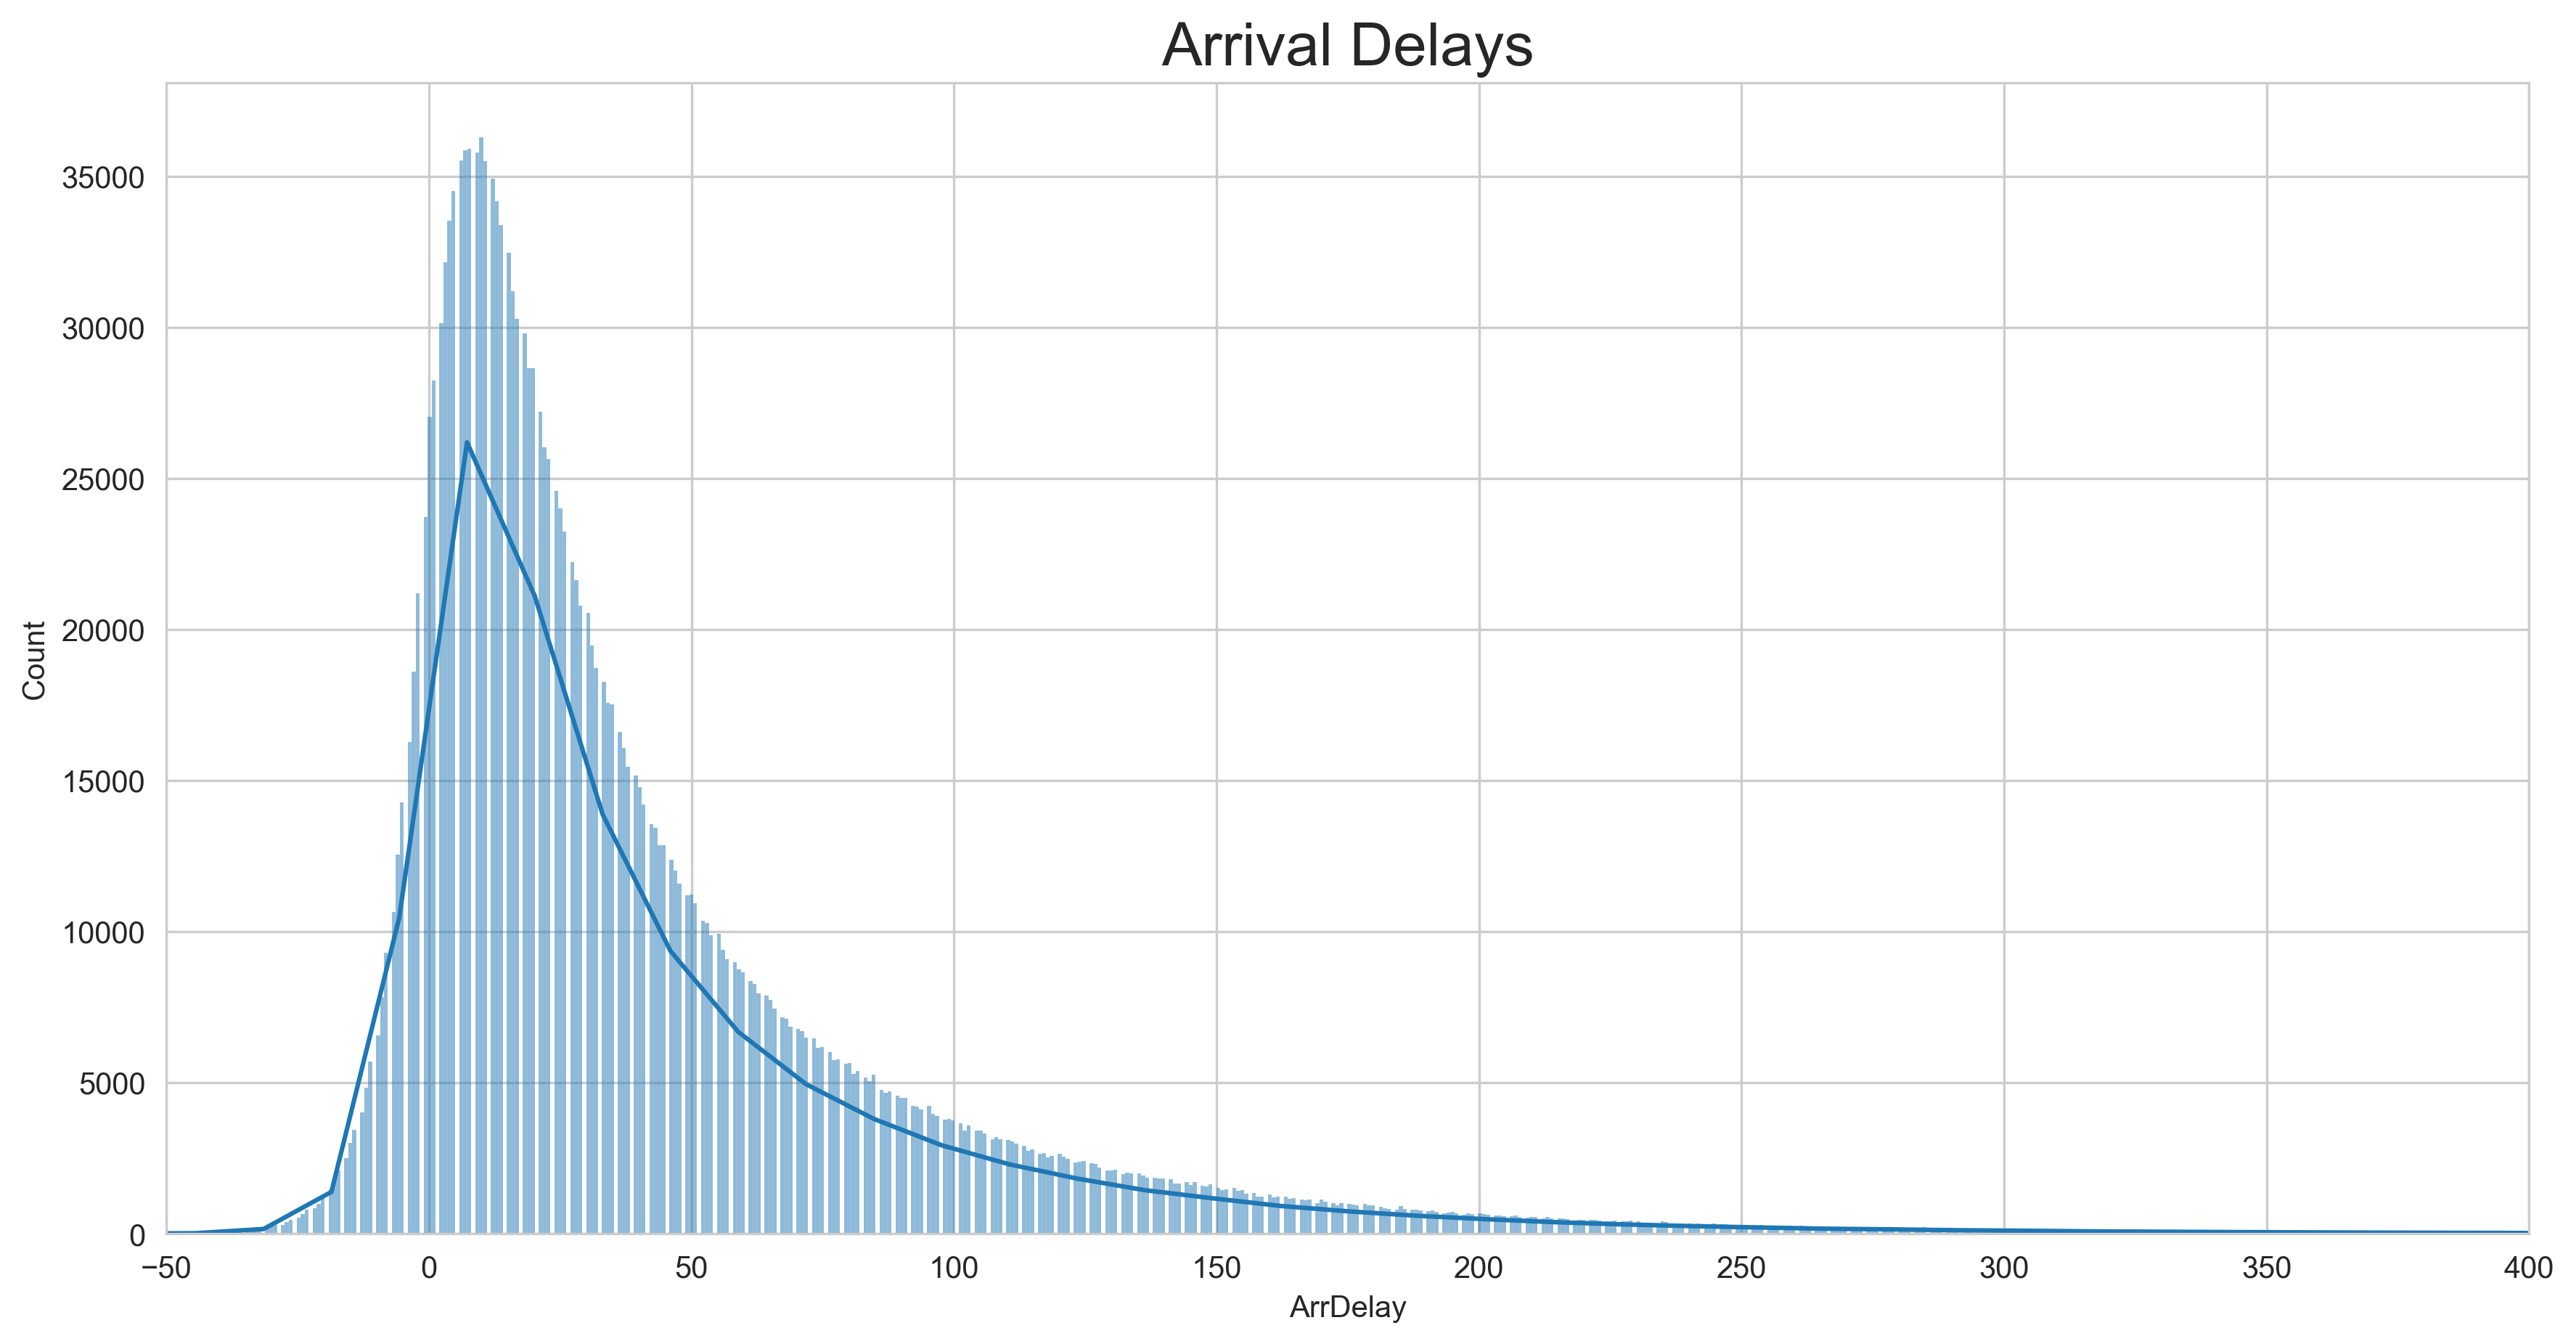

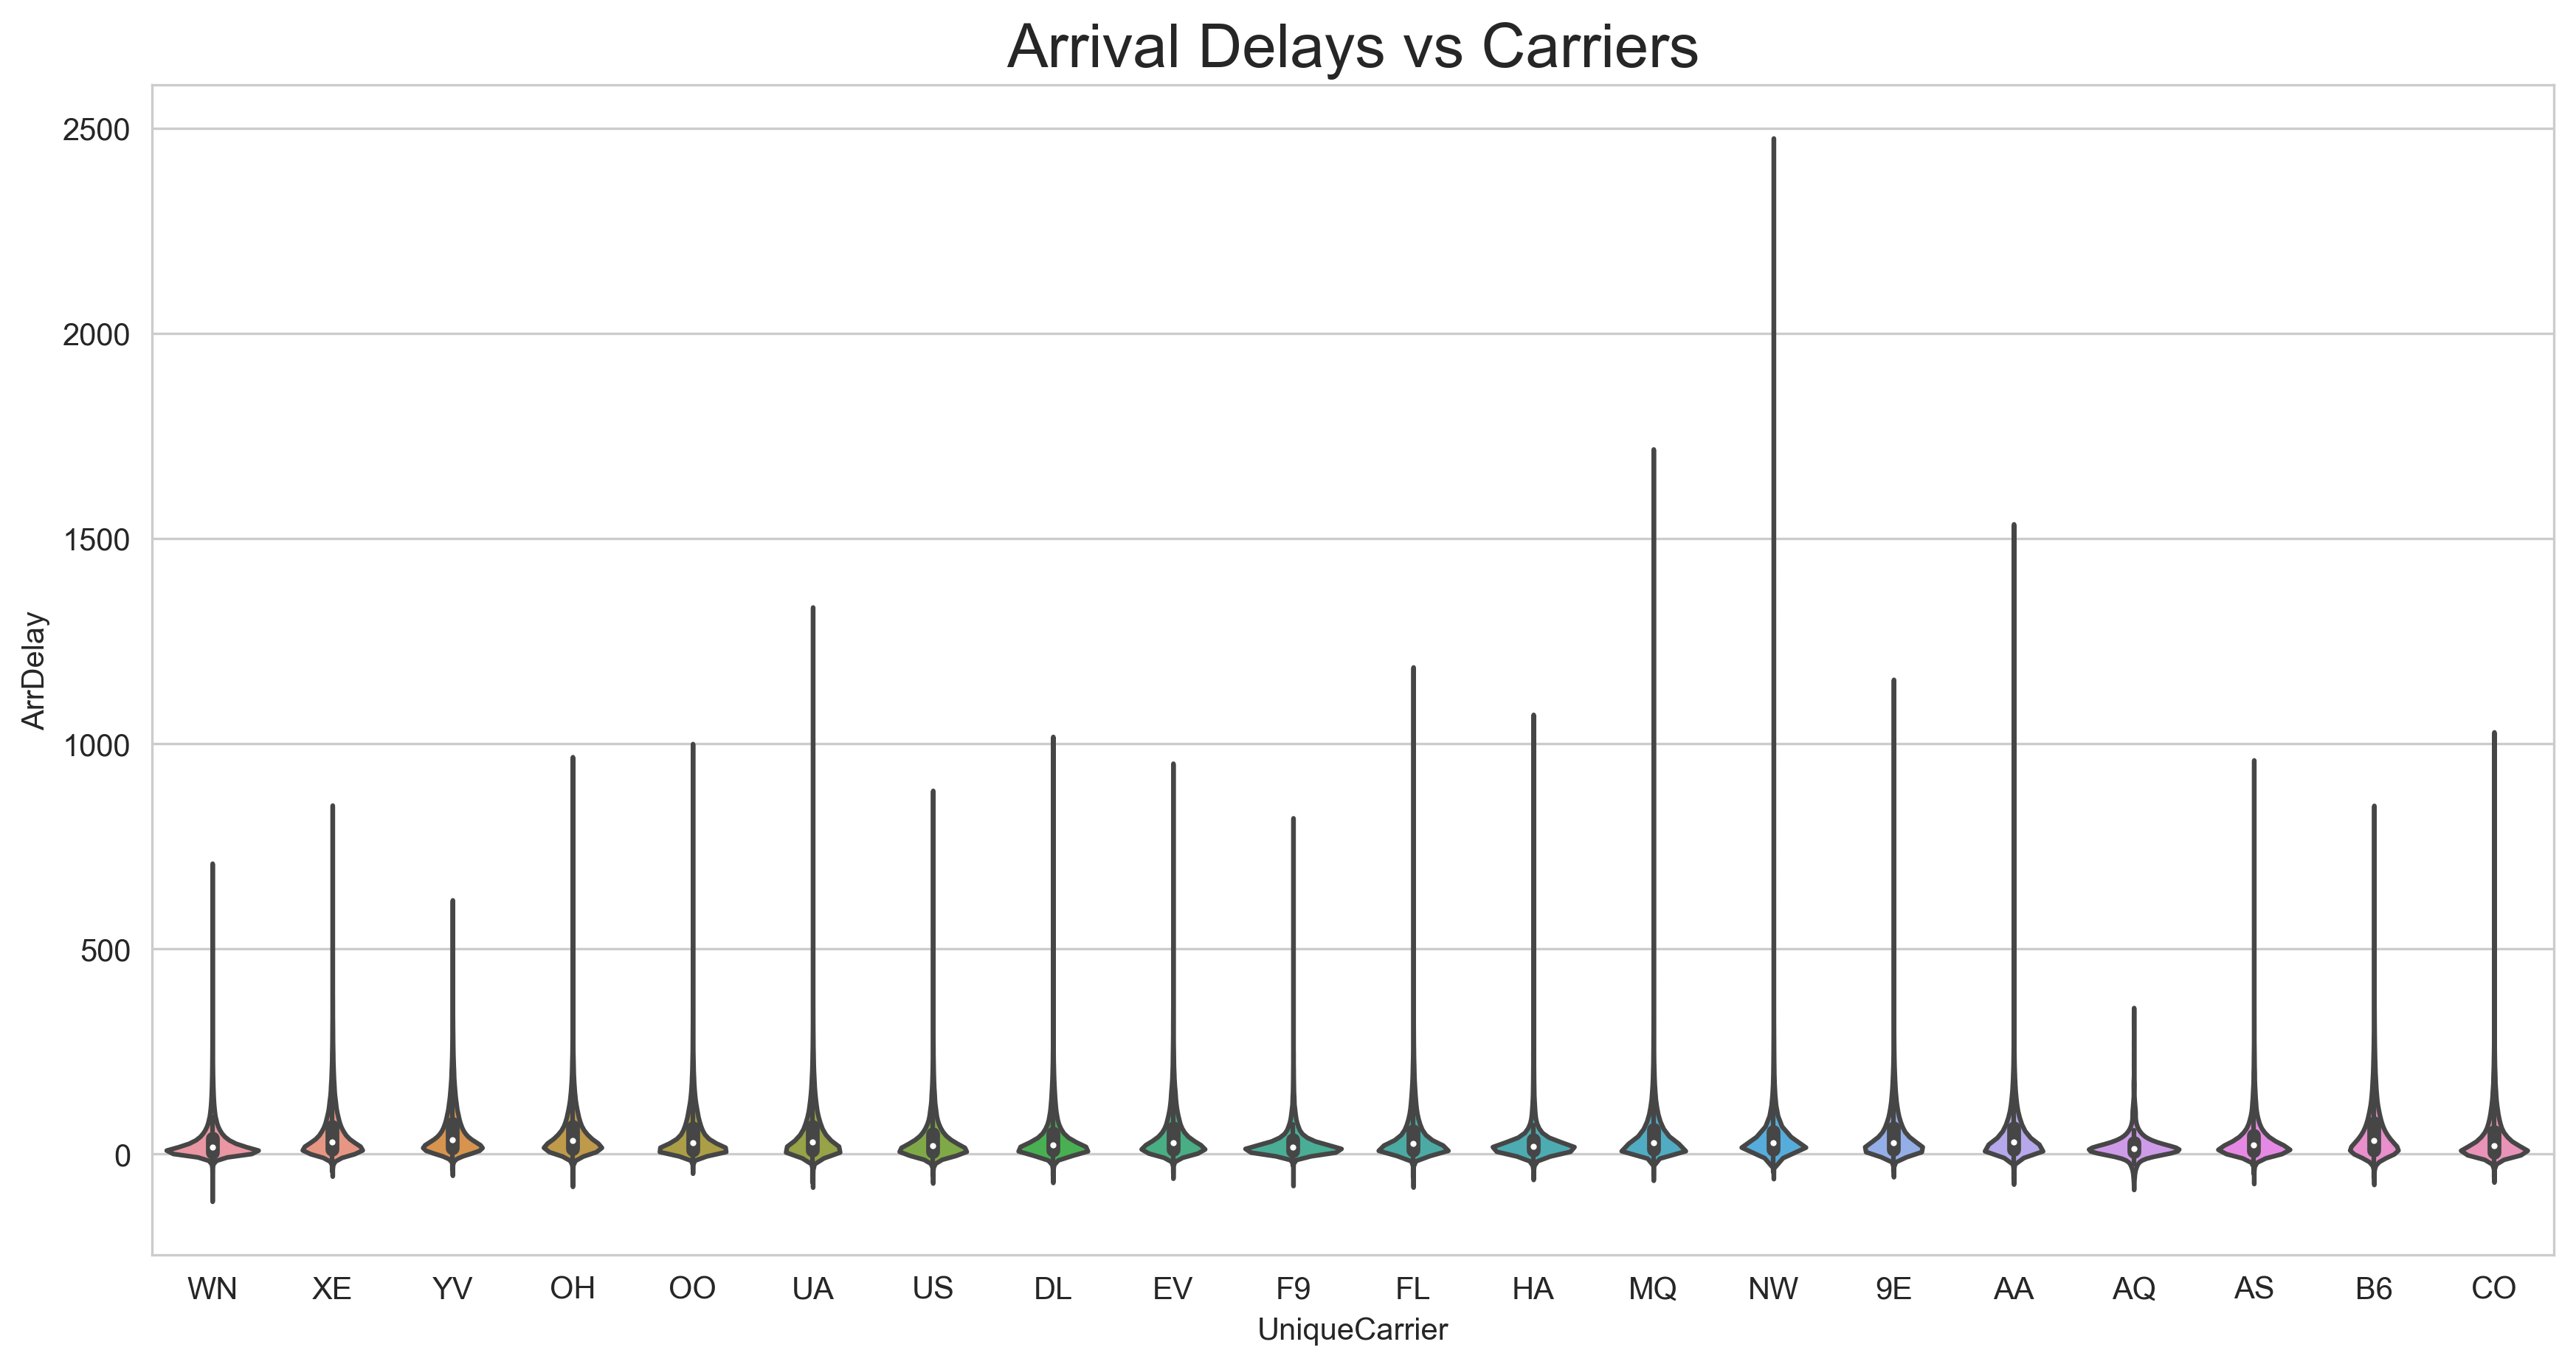

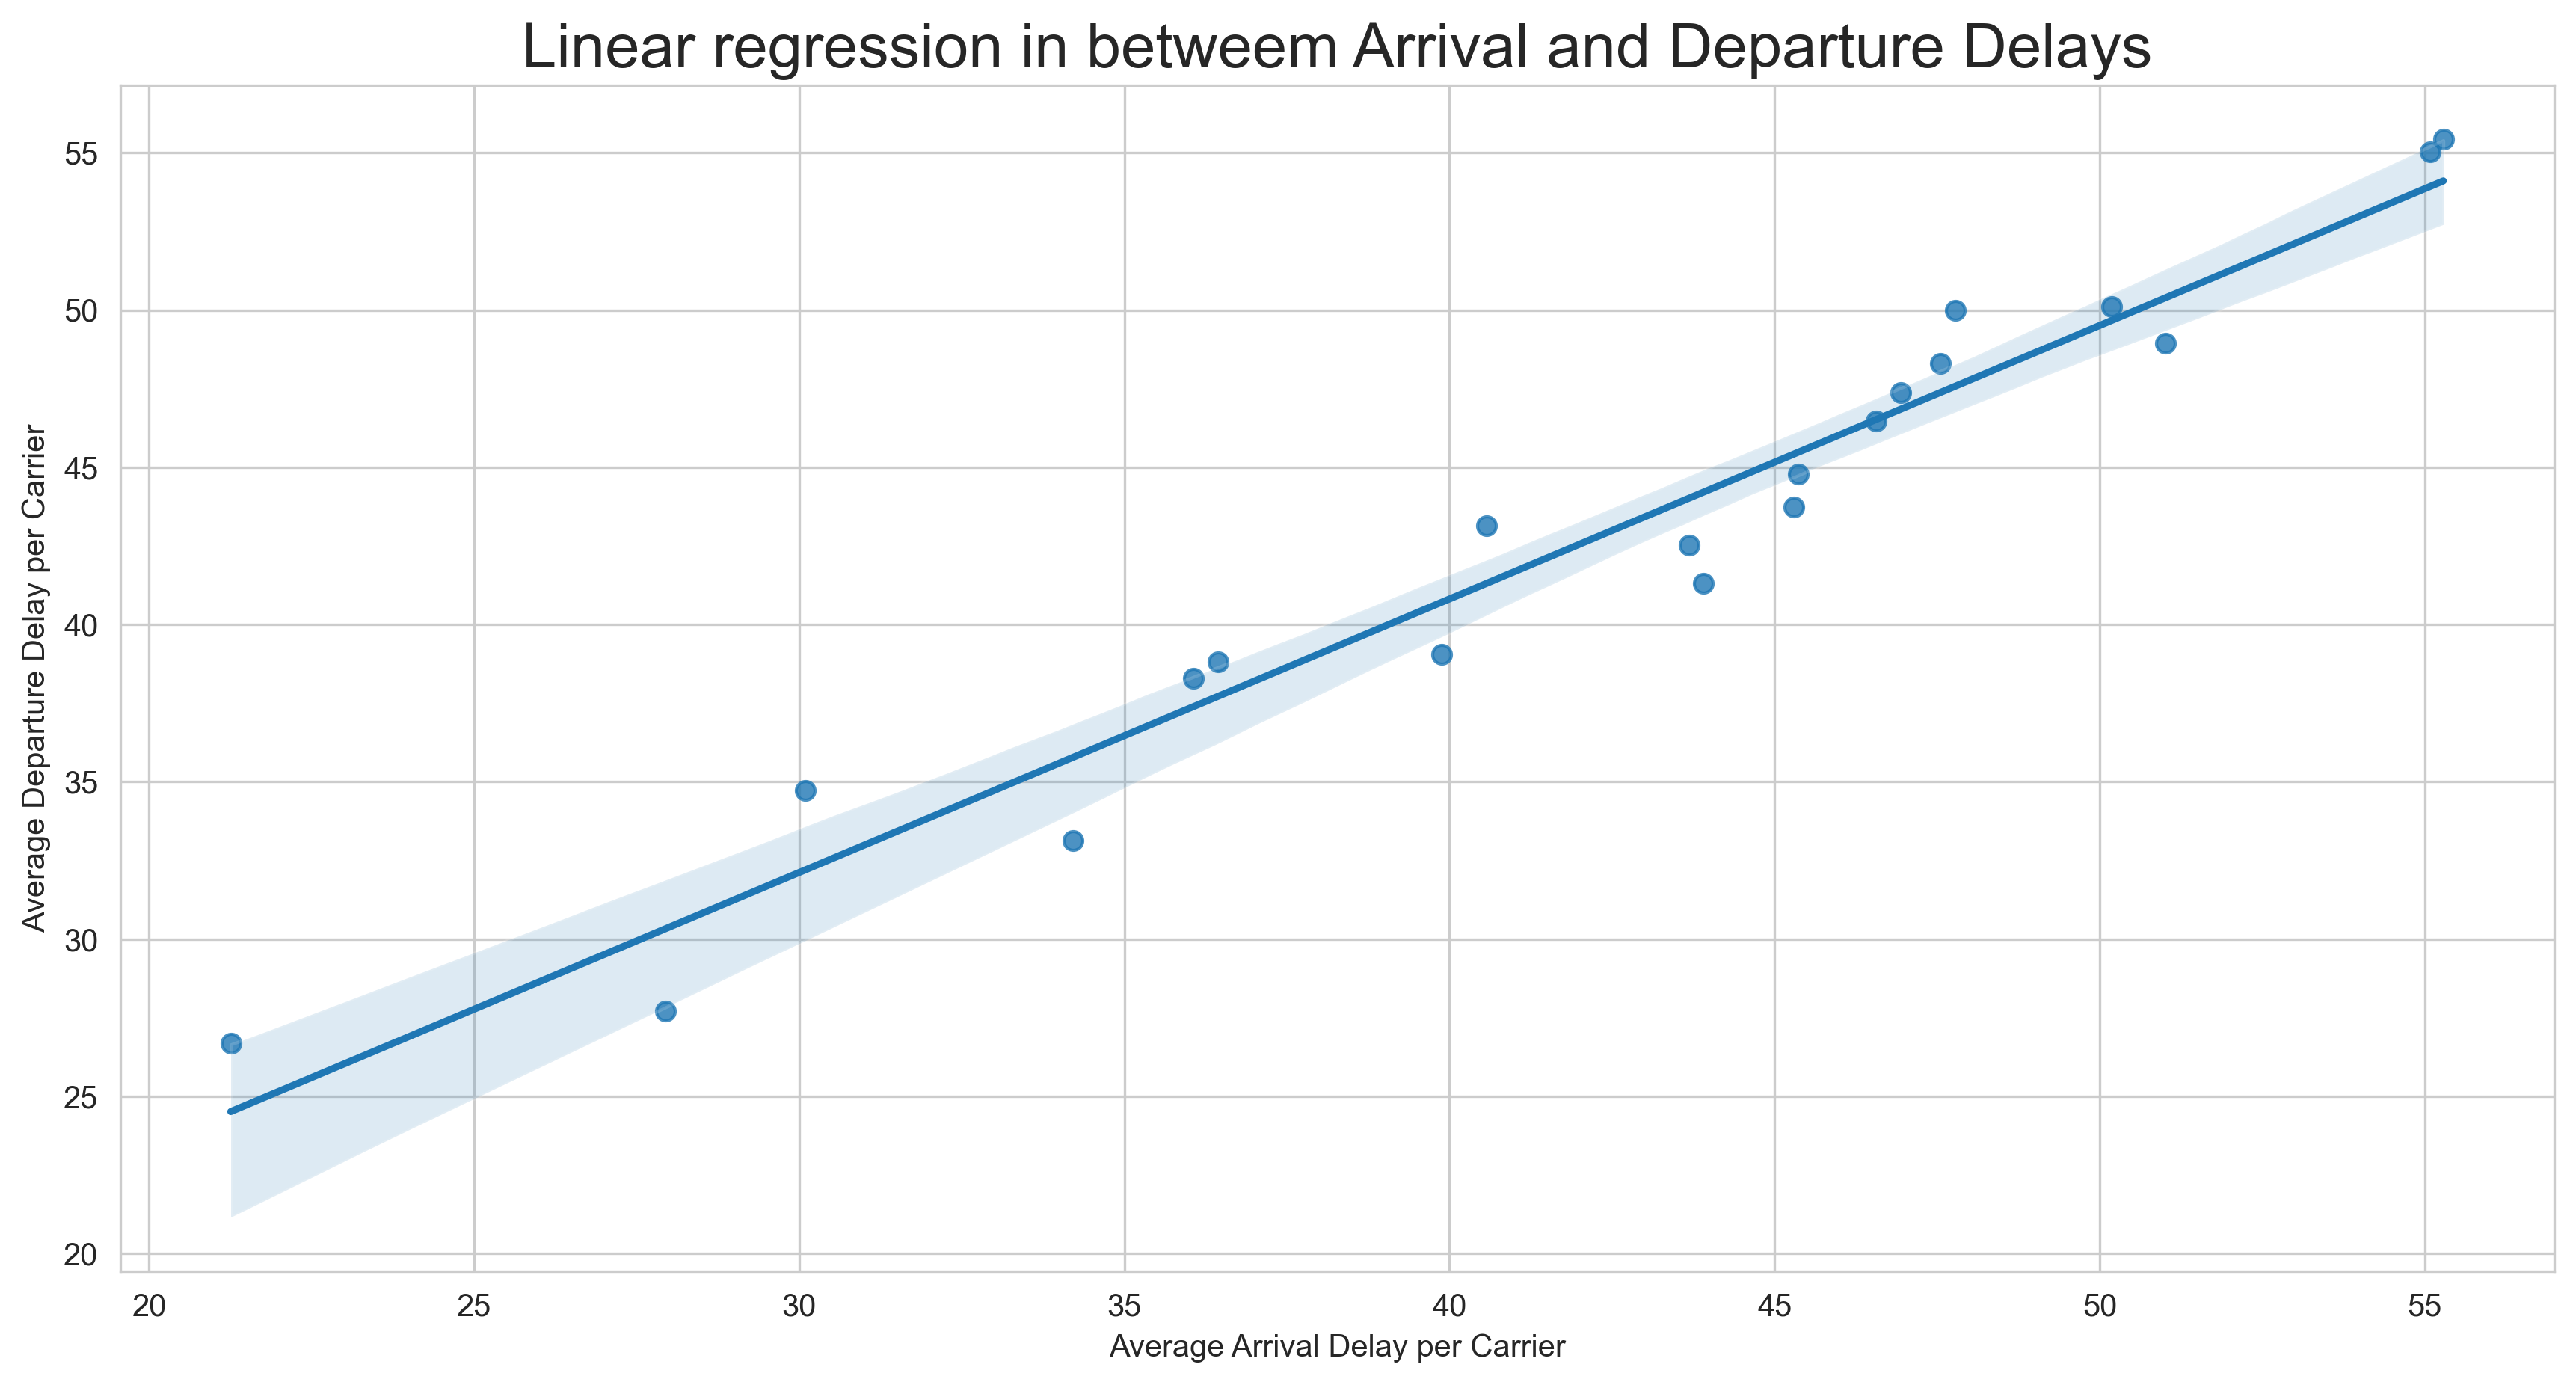

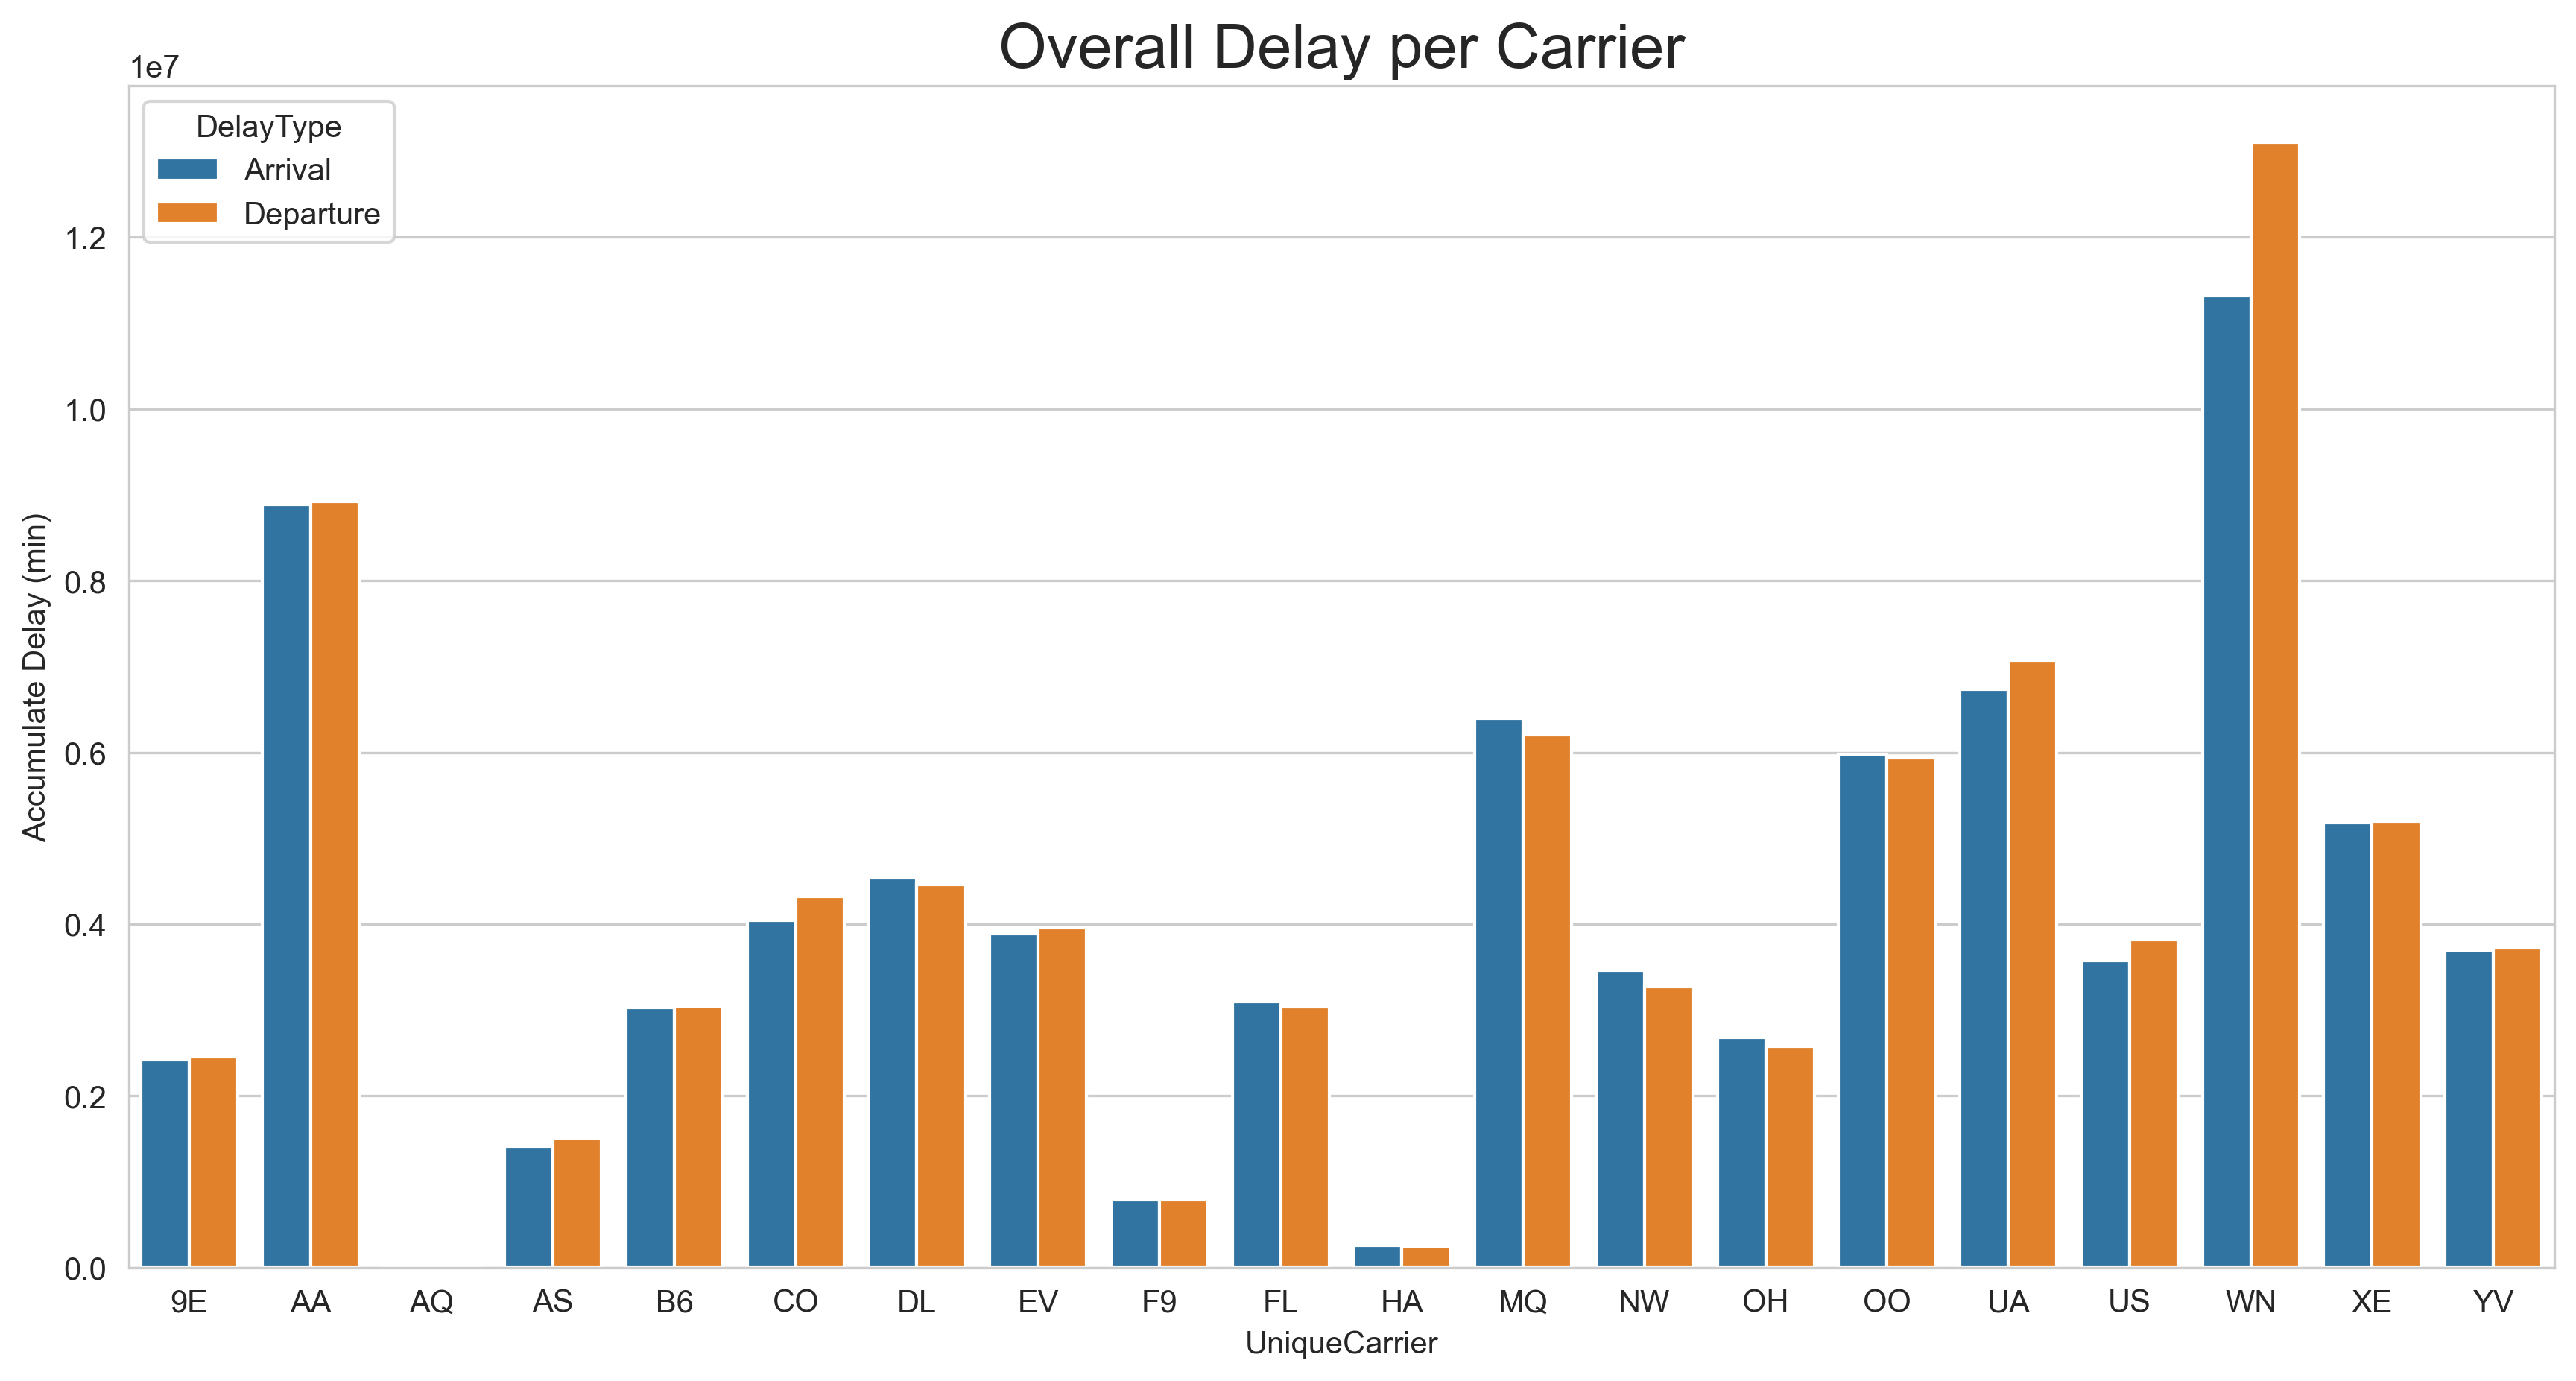

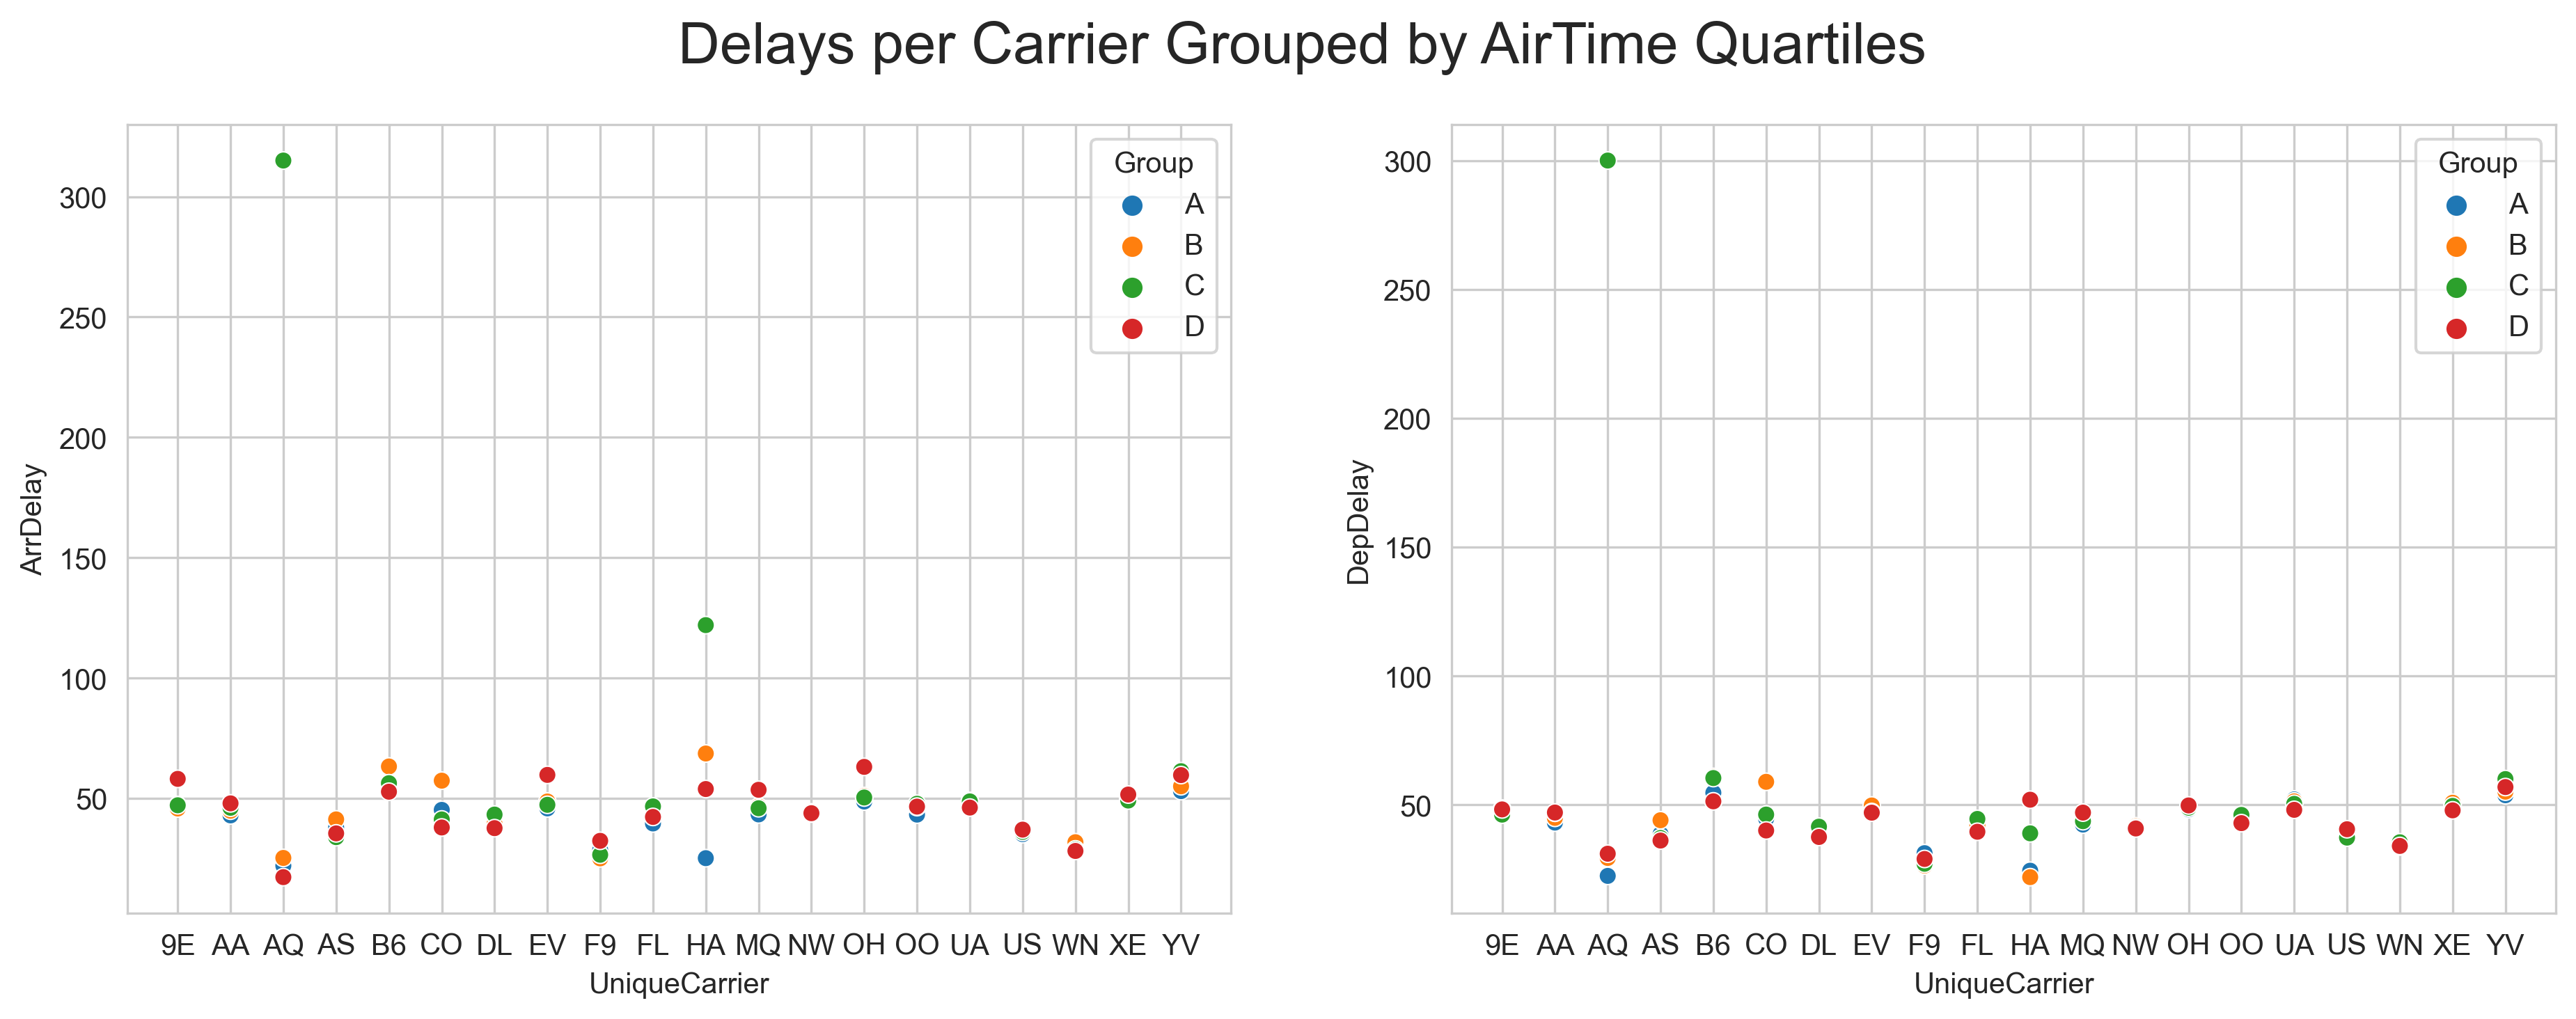

## Exercici 3
**Exporta el data set net i amb les noves columnes a Excel**

To avoid run out of Colab RAM, we divide the data in 4 sections and export each of them into a different sheet.

In [34]:
#!pip install xlsxwriter

In [35]:
#import xlsxwriter
writer = pd.ExcelWriter('AirlinesDelays.xlsx', engine='xlsxwriter')

In [36]:
df_al[0:500000].to_excel(writer, sheet_name='Sheet 1')

In [37]:
df_al[500000:1000000].to_excel(writer, sheet_name='Sheet 2')

In [38]:
df_al[1000000:1500000].to_excel(writer, sheet_name='Sheet 3')

In [39]:
df_al[1500000:].to_excel(writer, sheet_name='Sheet 4')

In [40]:
writer.save()   #Close the Pandas Excel writer and output the Excel file